# Linear Regression
- 수치예측

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 실습용 데이터 설정
* seaborn 'mpg' Data Set

In [1]:
import seaborn as sns

DF = sns.load_dataset('mpg')

* 자동차 연비(mpg) 데이터
 * mpg : miles per gallon
 * 1 mile : 1.6 Km
 * 1 gallon : 3.78 Liter

* pandas DataFrame

In [2]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
DF.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


## 단순 회귀

* First-Order Function

### 분석 변수 선택

In [4]:
DF1 = DF[['mpg', 'cylinders', 'displacement', 'weight']]

DF1.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


### 상관관계 그래프

* matplotlib

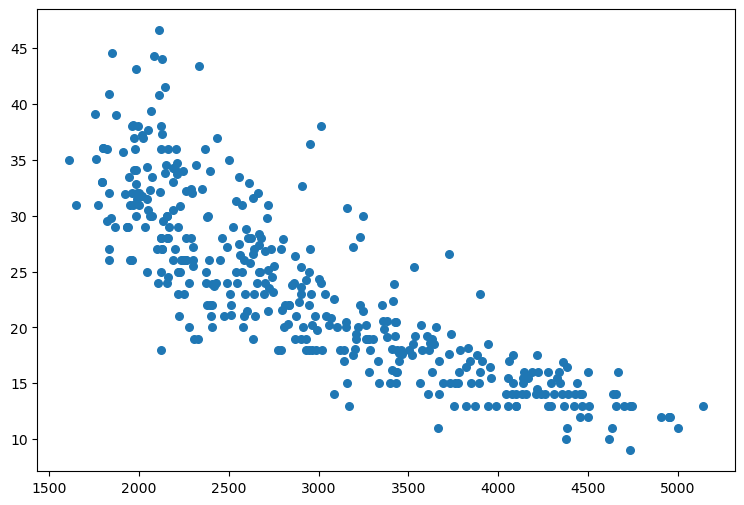

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.scatter(x = DF1.weight, y = DF1.mpg, s = 30)
plt.show()

* seaborn

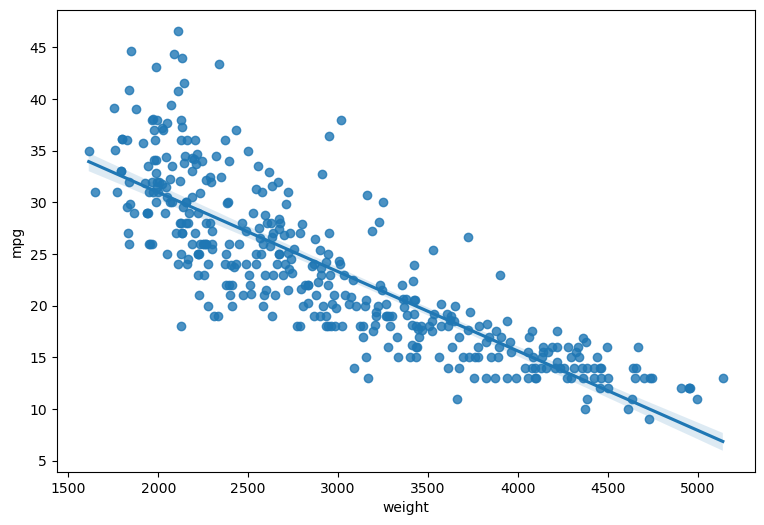

In [6]:
fig = plt.figure(figsize = (9, 6))
sns.regplot(x = 'weight', y = 'mpg', data = DF1, fit_reg = True)
plt.show()

* pairplot

C:\Users\n2465\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


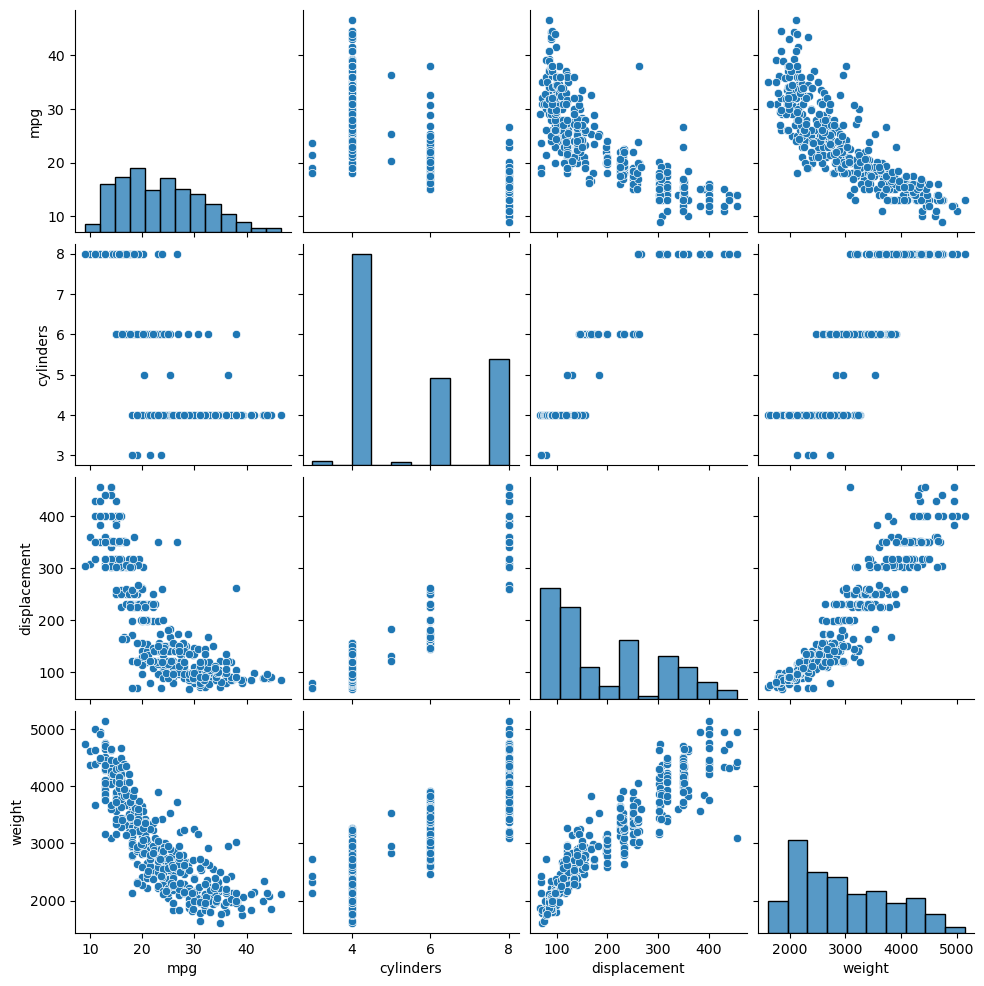

In [7]:
sns.pairplot(DF1)  
plt.show()

### 상관계수(Correlation Coefficient)

* Pearson's r

* mpg vs. weight

In [8]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.weight)[0]

-0.8317409332443348

* mpg vs. displacement

In [9]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.displacement)[0]

-0.8042028248058988

* mpg vs. cylinders

In [10]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.cylinders)[0]

-0.7753962854205525

### Train & Test Split

* 7:3

In [13]:
from sklearn.model_selection import train_test_split
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [11]:
from sklearn.model_selection import train_test_split

X = DF1[['weight']]
y = DF1['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 1) (278,)
Test Data :  (120, 1) (120,)


### 선형회귀 Modeling

* 모델 생성

In [12]:
from sklearn.linear_model import LinearRegression

SR = LinearRegression()
SR.fit(X_train, y_train)

LinearRegression()

* Weight 및 Bias

In [13]:
print('weight(w) : ', SR.coef_)
print('bias(b) : ', SR.intercept_)

weight(w) :  [-0.00766168]
bias(b) :  46.28223639092363


* 결정계수(R-Sqaure)

In [14]:
SR.score(X_test, y_test)

0.7164499678296495

### 모델 평가

* Mean Squared Error

In [15]:
from sklearn.metrics import mean_squared_error

y_hat_Xtest = SR.predict(X_test)

mean_squared_error(y_test, y_hat_Xtest)

17.01518447782976

### Visualization

* y vs. y_hat

C:\Users\n2465\AppData\Local\Temp\ipykernel_12768\298213196.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(SR_y, hist = False, label = 'y') # 전체데이터셋 종속변수(정답데이터)의 분포
C:\Users\n2465\AppData\Local\Temp\ipykernel_12768\298213196.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2

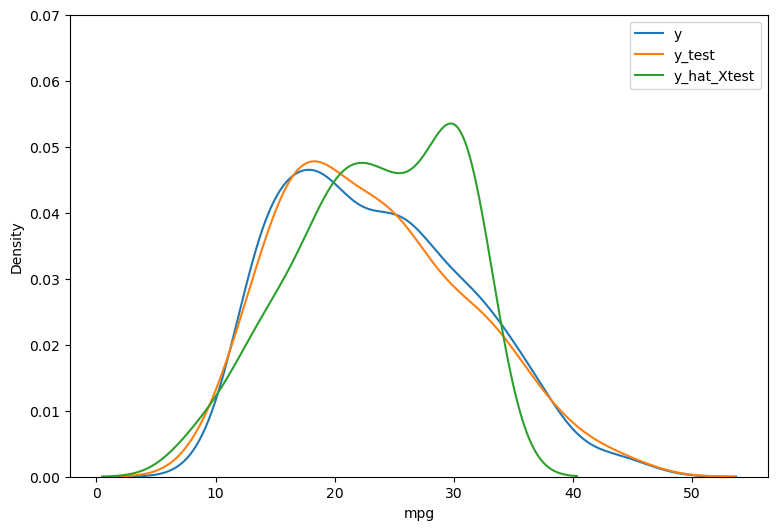

In [16]:
# 실제 정답데이터와 테스트셋 예측값에 대한 분포를 비교해보자
SR_y = y
SR_y_test = y_test
SR_y_hat_Xtest = SR.predict(X_test)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(SR_y, hist = False, label = 'y') # 전체데이터셋 종속변수(정답데이터)의 분포
ax2 = sns.distplot(SR_y_test, hist = False, label='y_test', ax = ax1) #  테스트셋 종속변수(정답데이터)의 분포
ax3 = sns.distplot(SR_y_hat_Xtest, hist = False, label='y_hat_Xtest', ax = ax1) # 테스트셋 독립변수(미훈련한 30%의 설명데이터)에 대한 회귀예측값의 분포

plt.legend()
plt.ylim(0, 0.07)
plt.show()

## 다항 회귀
* High-Order Function

### 분석 변수 선택

In [20]:
DF2 = DF[['mpg', 'cylinders', 'horsepower', 'weight']]

DF2.head(3)

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436


### Train & Test Split

* 7:3

In [21]:
from sklearn.model_selection import train_test_split

X = DF2[['weight']]
y = DF2['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 1) (278,)
Test Data :  (120, 1) (120,)


### 선형회귀 Modeling

* 2차 다항식 변환

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train) # X전체로 fit하면 안됨, 정답을 미리 알려주는 꼴

print('변환 전 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

변환 전 데이터:  (278, 1)
2차항 변환 데이터:  (278, 2)


* High-Order 모델 생성

In [23]:
from sklearn.linear_model import LinearRegression

PR = LinearRegression()
PR.fit(X_train_poly, y_train)

LinearRegression()

* Weight 및 Bias

In [24]:
import numpy as np
np.set_printoptions(suppress = True, precision = 10)

print('weight(w) : ', PR.coef_)
print('bias(b) : ', '%.8f' % PR.intercept_)

weight(w) :  [-0.0175042457  0.0000015338]
bias(b) :  60.88867527


* 결정계수(R-Sqaure)

In [29]:
X_test_poly = poly.transform(X_test)

PR.score(X_test_poly, y_test)

0.7525521808321769

### 모델 평가

* Mean Squared Error

In [30]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, PR.predict(X_test_poly))

14.848773810921923

### Visualization

* High-Order Model

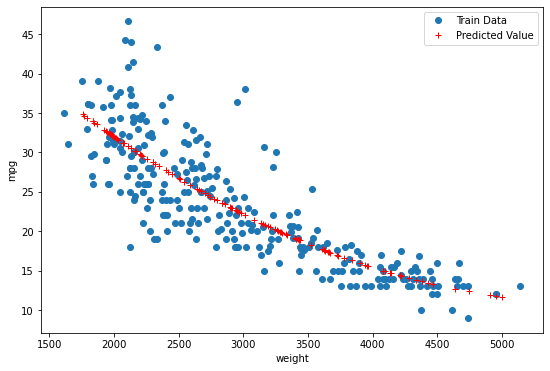

In [31]:
PR_y_hat_Xtest = PR.predict(X_test_poly)

plt.figure(figsize=(9, 6))
plt.plot(X_train, y_train, 'o', label = 'Train Data')
plt.plot(X_test, PR_y_hat_Xtest, 'r+', label = 'Predicted Value')
plt.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

* y vs. y_hat

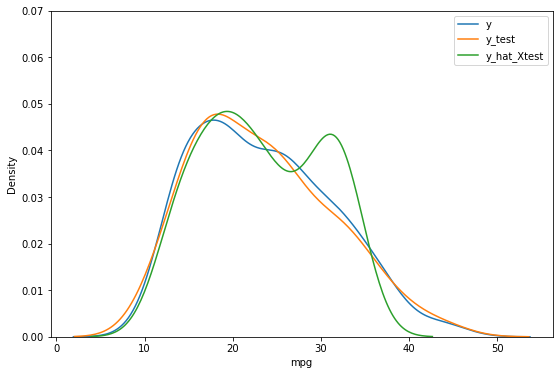

In [32]:
PR_y = y
PR_y_test = y_test
PR_y_hat_Xtest = PR.predict(X_test_poly)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(PR_y, hist=False, label="y")
ax2 = sns.distplot(PR_y_test, hist=False, label="y_test", ax=ax1)
ax3 = sns.distplot(PR_y_hat_Xtest, hist=False, label="y_hat_Xtest", ax=ax1)

plt.legend()
plt.ylim(0, 0.07)
plt.show()

## 다중 회귀

### 분석 변수 선택

In [33]:
DF3 = DF[['mpg', 'cylinders', 'displacement', 'weight']]

DF3.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


### Train &Test Split

* 7:3

In [34]:
from sklearn.model_selection import train_test_split

X = DF3[['displacement', 'weight']]
y = DF3['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 2) (278,)
Test Data :  (120, 2) (120,)


### 다중회귀 Modeling

* 모델 생성

In [36]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression()   
MR.fit(X_train, y_train)

LinearRegression()

* Weight 및 Bias

In [37]:
print('weight(w) : ', MR.coef_)
print('bias(b) : ', '%.8f' % MR.intercept_)

weight(w) :  [-0.0176653275 -0.0056727314]
bias(b) :  43.74652237


* 결정계수(R-Sqaure)

In [173]:
MR.score?

In [38]:
MR.score(X_test, y_test)

0.720971246285159

In [40]:
# 다중회귀모형은 조정된 결정계수를 봐야한다.
# sklean lR에서 기능을 제공하지 않으므로 추가 계산을 해야함  또는 statsmodel api를 활용할 수있음
1 - (1-MR.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7162015239994352

### 모델 평가

* Mean Squared Error

In [41]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, MR.predict(X_test))

16.743872969214195

### Visualization

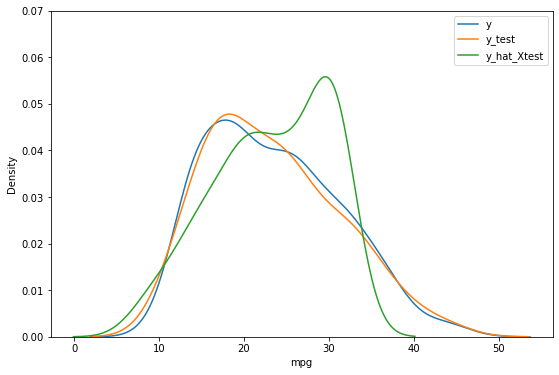

In [42]:
MR_y = y
MR_y_test = y_test
MR_y_hat_Xtest = MR.predict(X_test)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(MR_y, hist = False, label = 'y')
ax2 = sns.distplot(MR_y_test, hist = False, label = 'y_test')
ax3 = sns.distplot(MR_y_hat_Xtest, hist = False, label='y_hat_Xtest', ax = ax1)

plt.ylim(0, 0.07)
plt.legend()
plt.show()

## 비교 시각화

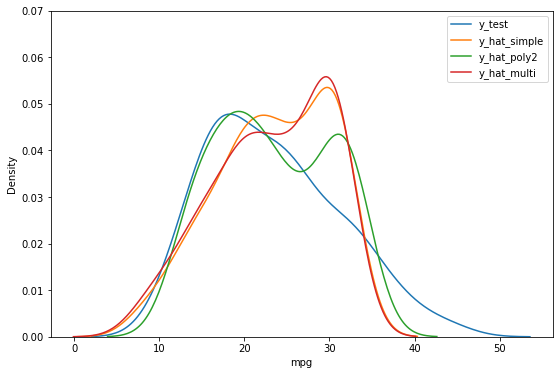

In [43]:
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test')
ax2 = sns.distplot(SR_y_hat_Xtest, hist = False, label='y_hat_simple', ax = ax1) # 단순회귀
ax3 = sns.distplot(PR_y_hat_Xtest, hist = False, label='y_hat_poly2', ax = ax1) # 다항회귀 2차
ax4 = sns.distplot(MR_y_hat_Xtest, hist = False, label='y_hat_multi', ax = ax1) # 다중회귀
plt.legend()
plt.ylim(0, 0.07)
plt.show()

## 회귀분석 연습하기
* 의료비 지출 예측 모델링

In [17]:
import warnings
warnings.filterwarnings('ignore')

### 실습용 데이터 설정

* pandas DataFrame
 - Insurance.csv

In [18]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
DF.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


### 탐색적 데이터 분석

* 시각화 패키지

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 

#### 전체 의료비 분포

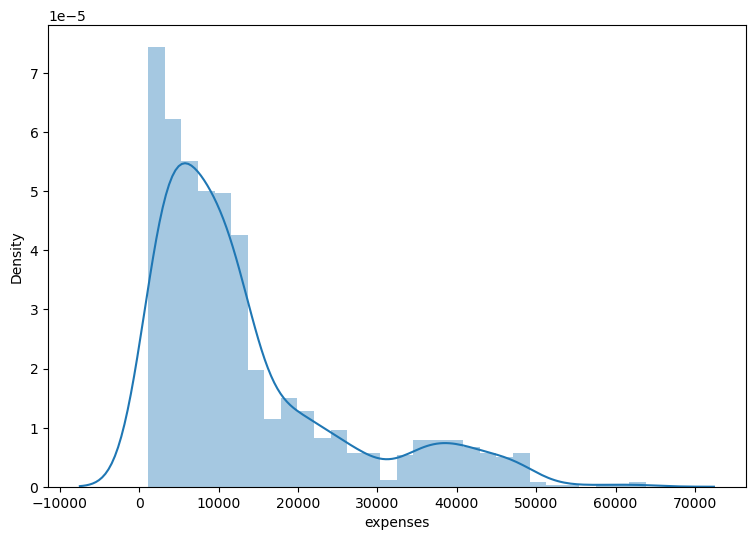

In [21]:
plt.figure(figsize = (9, 6))
sns.distplot(DF.expenses,
             hist = True,
             kde = True)
plt.show()

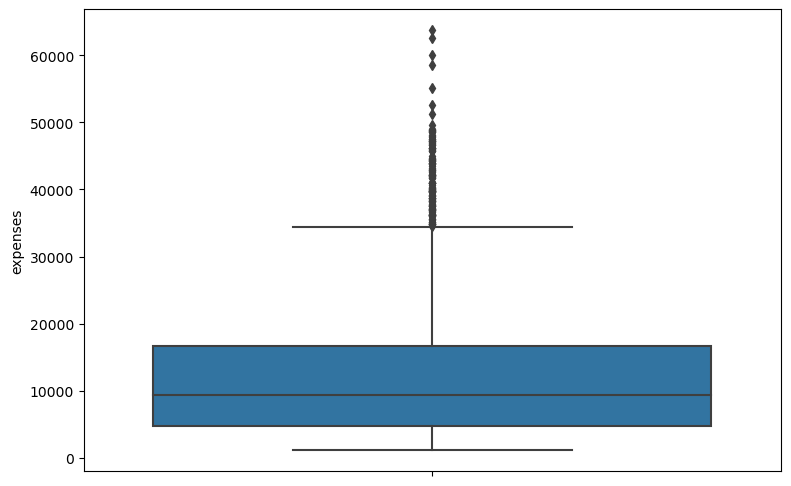

In [22]:
plt.figure(figsize = (9, 6))
sns.boxplot(y = 'expenses', data = DF)
plt.show()

#### 성별 별 의료비 분포

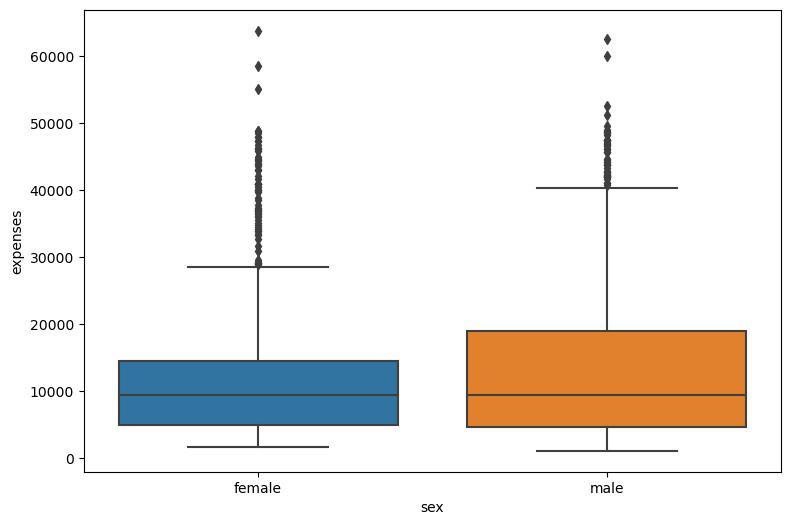

In [23]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'sex', y = 'expenses', data = DF)
plt.show()

In [24]:
DF.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

#### 자녀수 별 의료비 분포

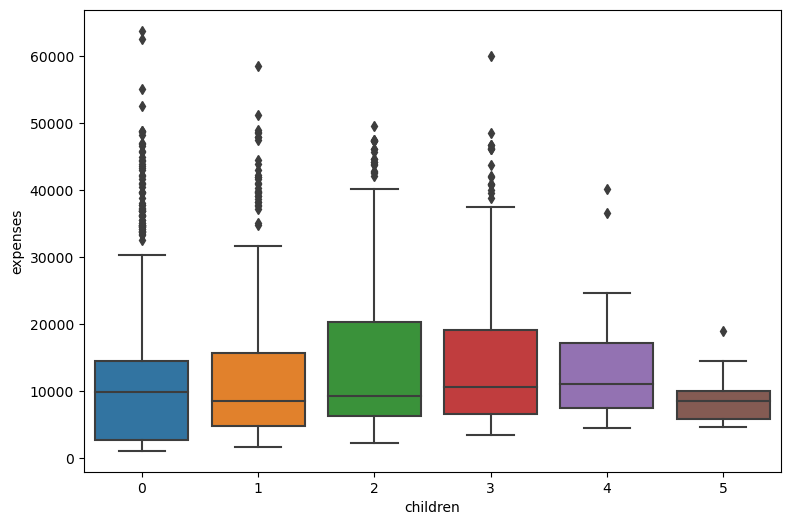

In [25]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'children', y = 'expenses', data = DF)
plt.show()

In [26]:
DF.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

#### 흡연여부 별 의료비 분포

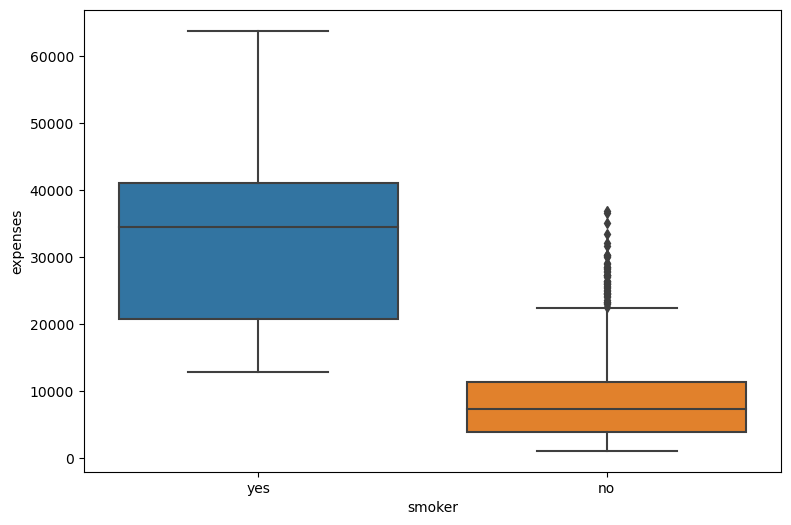

In [27]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'smoker', y = 'expenses', data = DF)
plt.show()

In [28]:
DF.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

#### 거주지역 별 의료비 분포

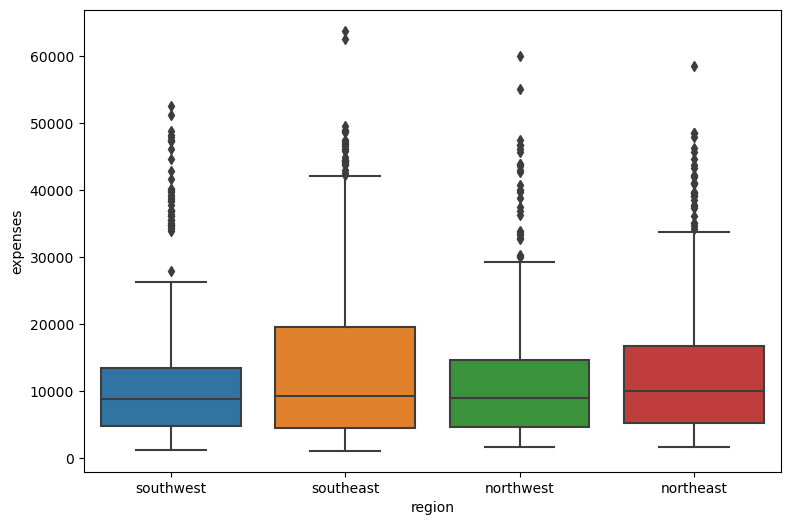

In [29]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'region', y = 'expenses', data = DF)
plt.show()

In [30]:
DF.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

#### BMI 분포 및 의료비와의 관계

* BMI 분포

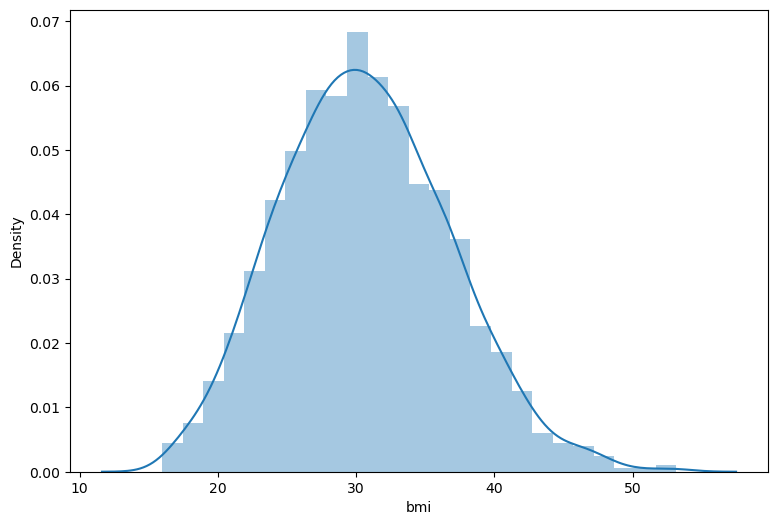

In [31]:
plt.figure(figsize = (9, 6))
sns.distplot(DF.bmi,
             hist = True,
             kde = True)
plt.show()

* BMI와 의료비 간의 관계

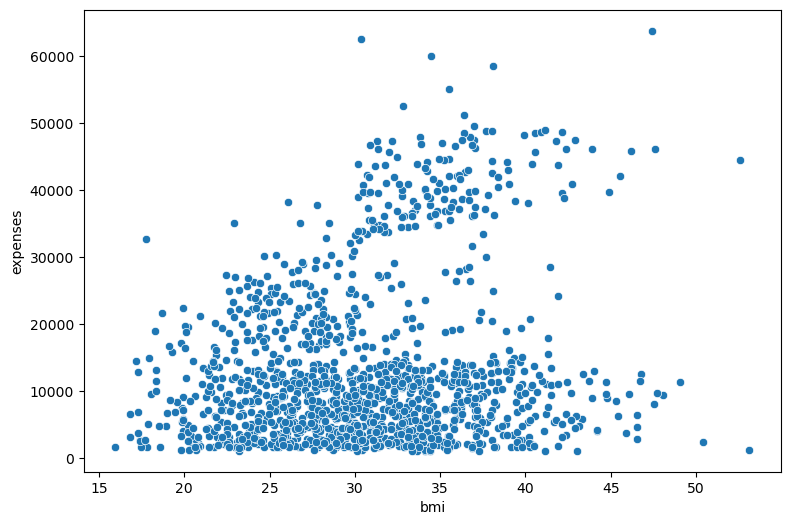

In [32]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = DF.bmi, y = DF.expenses)
plt.show()

### Modeling - sklearn Package

#### Integer Encoding

* object to int64

In [33]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* LabelEncoder( )
 - 'sex', 'smoker', 'region' to int64

In [34]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
DF['sex'] = encoder1.fit_transform(DF.sex)

In [35]:
encoder2 = LabelEncoder()
DF['smoker'] = encoder2.fit_transform(DF.smoker)

In [36]:
encoder3 = LabelEncoder()
DF['region'] = encoder3.fit_transform(DF.region)

* Encoding 결과 확인

In [37]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


* 변경된 값 확인

In [38]:
DF.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### Train & Test Array Split(7:3)

In [39]:
from sklearn.model_selection import train_test_split

X = DF[['age', 'sex']]
y = DF['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (936, 2) (936,)
Test Data :  (402, 2) (402,)


#### .fit( )

In [40]:
from sklearn.linear_model import LinearRegression

RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression()

#### .predict( )

In [41]:
y_hat = RA.predict(X_test)

#### 오차(Error)값 확인

* Mean Sqaured Error - sklearn

In [42]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse1 = mean_squared_error(y_test, y_hat)

np.sqrt(mse1)

10633.607635499553

### Modeling - statsmodels Package

In [43]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Data Preprocessing

* Train & Test DataFrame Split(7:3)

In [44]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(DF,
                                       test_size = 0.3,
                                       random_state = 2045)

train_set.shape, test_set.shape

((936, 7), (402, 7))

In [45]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 8 to 887
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       936 non-null    int64  
 1   sex       936 non-null    object 
 2   bmi       936 non-null    float64
 3   children  936 non-null    int64  
 4   smoker    936 non-null    object 
 5   region    936 non-null    object 
 6   expenses  936 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 58.5+ KB


#### expenses ~ age + sex

* train_set으로 모델 생성
* OLS(최소자승법) : Ordinary Least Squares

In [46]:
import statsmodels.formula.api as smf

Model_1 = smf.ols(formula = 'expenses ~ age + sex',
                  data = train_set).fit()

#### y_hat 생성

* test_set으로 y_hat(예측값) 계산

In [47]:
y_hat_1 = Model_1.predict(test_set[['age', 'sex']])

#### 오차(Error)값 확인

* Mean Sqaured Error - sklearn

In [48]:
mse2 = mean_squared_error(test_set.expenses, y_hat_1)

np.sqrt(mse2)

10633.607635499555

### Package별 오차값 비교

In [49]:
print('sklearn     :', np.sqrt(mse1))
print('statsmodels :', np.sqrt(mse2))

sklearn     : 10633.607635499553
statsmodels : 10633.607635499555


# Logistic Regression

## Sigmoid (Actication) Function

In [44]:
import warnings
warnings.filterwarnings('ignore')

### sigmoid( ) 정의

In [50]:
import numpy as np

def sigmoid(x):
    y_hat = 1 / (1 + np.exp(-x))
    return y_hat

### sigmoid( ) 실행

In [51]:
sigmoid(0)

0.5

In [53]:
sigmoid(100000000)

1.0

In [54]:
sigmoid(-100000000)

0.0

### sigmoid( ) 시각화

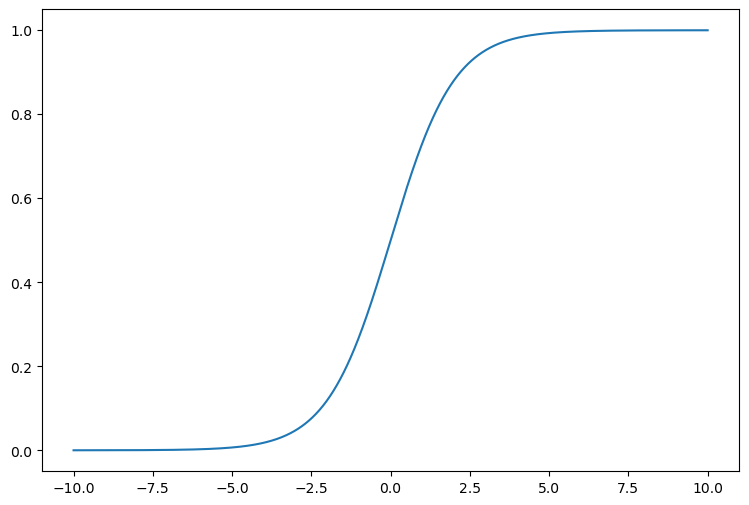

In [55]:
import matplotlib.pyplot as plt

n = np.linspace(-10.0, 10.0, 2000)

plt.figure(figsize = (9, 6))
plt.plot(n, sigmoid(n))
plt.show()

## Binary Classification - 분류

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 실습용 데이터 설정

* pandas DataFrame
 * Default.csv

In [2]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Default.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [3]:
DF.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


### 탐색적 데이터 분석

#### 빈도분석

In [4]:
DF.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

##### 분포 시각화

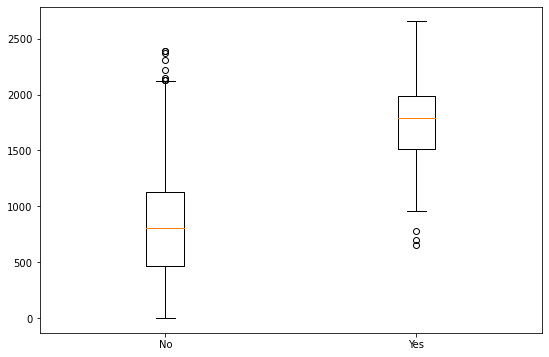

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.boxplot([DF[DF.default == 'No'].balance,
             DF[DF.default == 'Yes'].balance],
            labels = ['No', 'Yes'])
plt.show()

### Data Preprocessing

##### X, y

In [7]:
X = DF[['balance']]
y = DF['default']

##### Train & Test Split

* 7: 3

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7000, 1) (7000,)
Test Data :  (3000, 1) (3000,)


### Modeling

#### Train_Data로 모델 생성

In [9]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression()

#### Test_Data에 Model 적용

In [10]:
y_hat = Model_lr.predict(X_test)

* y_hat

In [11]:
y_hat 

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

### Model Validation

#### Confusion Matrix

* 'No'(상환) 기준

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix?

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If

In [14]:
confusion_matrix(y_test, y_hat)

array([[2888,    8],
       [  72,   32]], dtype=int64)

* 'Yes'(연체) 기준

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = ['Yes','No'])

array([[  32,   72],
       [   8, 2888]], dtype=int64)

#### Accuracy, Precision, Recall - 'No(상환)'

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'No'))
print(recall_score(y_test, y_hat, pos_label = 'No'))

0.9733333333333334
0.9756756756756757
0.9972375690607734


#### Accuracy, Precision, Recall - 'Yes(연체)'
- 예측목표가 연체자를 예측하는 것으로 목적이 명료하므로, yes기준 recall이 핵심 평가지표가 된다.

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Yes'))
print(recall_score(y_test, y_hat, pos_label = 'Yes'))

0.9733333333333334
0.8
0.3076923076923077


#### 4) F1_Score - 'No(상환)'

In [18]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'No')

0.9863387978142076

#### 5) F1_Score - 'Yes(연체)'

In [19]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'Yes')

0.4444444444444444

#### Classification Report

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['No', 'Yes'],
                            digits = 5))

              precision    recall  f1-score   support

          No    0.97568   0.99724   0.98634      2896
         Yes    0.80000   0.30769   0.44444       104

    accuracy                        0.97333      3000
   macro avg    0.88784   0.65246   0.71539      3000
weighted avg    0.96959   0.97333   0.96755      3000



# Cross Entropy Error

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Cross Entropy

* 서로 다른 사건의 확률을 곱하여 Entropy를 계산
 * y : 실제값, y_hat : 예측값(can be incorrect)
* y를 Cross-Entropy의 가중치로 적용
 * Binary Cross-Entropy Error = –y * log(y_hat) – (1 - y) * log(1 - y_hat)
 * Categorical Cross-Entropy Error = –y * log(y_hat)

### y = 1 vs. y_hat = 1

In [3]:
import numpy as np

y = 1
y_hat = 1

-y * np.log(y_hat)

-0.0

### y = 1 vs. y_hat = 0.0001

In [6]:
y = 1
y_hat = 0.0001

-y * np.log(y_hat)

9.210340371976182

### y = 0 vs. y_hat = 0

In [7]:
y = 0
y_hat = 0

-(1 - y) * np.log(1 - y_hat)

-0.0

### y = 0 vs. y_hat = 0.9999

In [8]:
y = 0
y_hat = 0.9999

-(1 - y) * np.log(1 - y_hat)

9.210340371976294

## Information Theory


### 발생 확률이 서로 다른 사건 A, B, C - Information Gain

* Information Gain(정보 이득량)
 * 자주 발생하지 않는 사건은 자주 발생하는 사건보다 전달하는 정보량이 많음
 * Information Gain(정보 이득량)은 정보의 희귀성(발생가능성)에 반비례
 * I(x) = –log(P(x))

In [9]:
# 각 사건이 발생할 확률
A = 0.9
B = 0.5
C = 0.1
# 가장 발생할 확률이 낮은 C가 정보량이 가장 높음
print('%.3f' % -np.log(A), '%.3f' % -np.log(B), '%.3f' % -np.log(C))

0.105 0.693 2.303


### AlphaGo와 Apes의 바둑대결 승리 확률 - Degree of Surprise

* Degree of Surprise(놀람의 정도)
 * 예상하기 어려운 정보에 더 높은 가치를 매기는 것

In [10]:
Alphago = 0.999
Apes = 0.001
# 알파고가 이겼을 때 놀람의 정도보다, 침팬지가 이겼을 때 놀람의 정도가 더 크다.
print('%.3f' % -np.log(Alphago), '%.3f' % -np.log(Apes))

0.001 6.908


## Entropy

* 불확실성의 정도
 * Entropy = E(–log(P(x)))
* 확률변수의 평균 정보량(기댓값)
 * –sum(p(x) * log(p(x)))
* 불확실성(Entropy)이 낮으면 분류정확도가 높아짐

### 승률이 비슷한 두팀의 Entropy

In [11]:
P1 = 0.5
P2 = 0.5

-P1 * np.log(P1) - P2 * np.log(P2)

0.6931471805599453

### 승률 차이가 큰 두팀의 Entropy

In [12]:
P1 = 0.999
P2 = 0.001

-P1 * np.log(P1) - P2 * np.log(P2)

0.007907255112232087

# The End